In [1]:
! pip install collections-extended
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
! pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=de17a045c8d667d5763bcbb3789808d2d767b0096d1c6cc93eeb2983cf7d81ef
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
from collections import Counter
l1 = [2,3,4,44,4,4,44,4,2,2,2,2]
count = Counter(l1)
# print(count)
count.most_common(1)[0][0]
count.most_common(2)[1][0]

4

In [3]:
# importing libraries
from langdetect import detect
from googletrans import Translator
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
data = pd.read_csv('dataset_es_train.csv')
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [5]:
data.shape

(200000, 8)

In [6]:
sample = data.sample(1000)
sample.reset_index(drop=True,inplace=True)


In [7]:
sample

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0800085,product_es_0043700,reviewer_es_0898278,1,"Tristemente no me ha servido para nada, cualqu...",Tirar el dinero,es,beauty
1,es_0830856,product_es_0969701,reviewer_es_0671781,2,Ha llegado en una caja de cartón que indicaba ...,Caja no original y calidad regular,es,shoes
2,es_0600205,product_es_0743192,reviewer_es_0457679,5,Es un señor libró explica todo muy bien fácil ...,Un señor libro,es,book
3,es_0017791,product_es_0474449,reviewer_es_0457590,5,Producto muy útil para la silla de oficina y s...,Correcto,es,office_product
4,es_0749806,product_es_0993460,reviewer_es_0971459,5,Están mejoradas. Tiene la suela buena. Me gust...,Buenos materiales un logro tanta perfección,es,industrial_supplies
...,...,...,...,...,...,...,...,...
995,es_0496078,product_es_0764926,reviewer_es_0812371,1,"No vale nada, la calidad es malísima. Se desco...",Faja calor,es,wireless
996,es_0577876,product_es_0413923,reviewer_es_0322701,3,Los termos tienen bueba pinta y de calidad. Si...,Buenos termos,es,baby_product
997,es_0772006,product_es_0015815,reviewer_es_0713851,1,Nunca me llegó el pedido... nisiquiera me come...,Cristina,es,luggage
998,es_0685815,product_es_0278241,reviewer_es_0897671,2,Queda un poco olgada y hay que apretar más de ...,Mala experiencia,es,wireless


In [8]:
df = sample[['review_body','stars']]
df

,review_body,stars
0,"Tristemente no me ha servido para nada, cualqu...",1
1,Ha llegado en una caja de cartón que indicaba ...,2
2,Es un señor libró explica todo muy bien fácil ...,5
3,Producto muy útil para la silla de oficina y s...,5
4,Están mejoradas. Tiene la suela buena. Me gust...,5
...,...,...
995,"No vale nada, la calidad es malísima. Se desco...",1
996,Los termos tienen bueba pinta y de calidad. Si...,3
997,Nunca me llegó el pedido... nisiquiera me come...,1
998,Queda un poco olgada y hay que apretar más de ...,2


In [9]:
# language detection
def lang_detect(data):
  lang = detect(data)
  return lang

In [10]:
print(df.review_body[0])
lang_detect(df.review_body[0])

Tristemente no me ha servido para nada, cualquier pegamento de bazar chino tiene la misma adherencia... Las uñas no me han aguantado ni una hora, y no se me ha caído una, han sido varias, muy decepcionada


'es'

In [11]:
df['language'] = df.review_body.apply(lang_detect)
df

,review_body,stars,language
0,"Tristemente no me ha servido para nada, cualqu...",1,es
1,Ha llegado en una caja de cartón que indicaba ...,2,es
2,Es un señor libró explica todo muy bien fácil ...,5,es
3,Producto muy útil para la silla de oficina y s...,5,es
4,Están mejoradas. Tiene la suela buena. Me gust...,5,es
...,...,...,...
995,"No vale nada, la calidad es malísima. Se desco...",1,es
996,Los termos tienen bueba pinta y de calidad. Si...,3,es
997,Nunca me llegó el pedido... nisiquiera me come...,1,es
998,Queda un poco olgada y hay que apretar más de ...,2,es


In [12]:
df.language.unique()

array(['es', 'ca', 'pt', 'de', 'it', 'sl'], dtype=object)

In [13]:
df.language.value_counts()

es    984
pt      5
de      5
ca      4
it      1
sl      1
Name: language, dtype: int64

In [14]:
# language translation
def lang_trans(data):
  translor = Translator()
  translated_text = translor.translate(data)
  return translated_text.text

In [15]:
print(df.review_body[0])
lang_trans(df.review_body[0])

Tristemente no me ha servido para nada, cualquier pegamento de bazar chino tiene la misma adherencia... Las uñas no me han aguantado ni una hora, y no se me ha caído una, han sido varias, muy decepcionada


"Sadly, it hasn't helped me at all, any glue from the Chinese bazaar has the same adherence... My nails haven't lasted an hour, and I haven't dropped one, there have been several, very disappointed"

In [16]:
df['translated_reviews'] = df.review_body.apply(lang_trans)
df

,review_body,stars,language,translated_reviews
0,"Tristemente no me ha servido para nada, cualqu...",1,es,"Sadly, it hasn't helped me at all, any glue fr..."
1,Ha llegado en una caja de cartón que indicaba ...,2,es,It has arrived in a cardboard box indicating t...
2,Es un señor libró explica todo muy bien fácil ...,5,es,It is a book gentleman explains everything ver...
3,Producto muy útil para la silla de oficina y s...,5,es,Very useful product for the office chair and i...
4,Están mejoradas. Tiene la suela buena. Me gust...,5,es,They are improved. It has a good sole. I like ...
...,...,...,...,...
995,"No vale nada, la calidad es malísima. Se desco...",1,es,"It's worth nothing, the quality is terrible. I..."
996,Los termos tienen bueba pinta y de calidad. Si...,3,es,The thermoses look good and are of good qualit...
997,Nunca me llegó el pedido... nisiquiera me come...,1,es,The order never arrived...they didn't even tel...
998,Queda un poco olgada y hay que apretar más de ...,2,es,It is a bit loose and you have to press more t...


In [17]:
# ngrams
def ngram_extractor(data,ngram_range):
  tokens = word_tokenize(data)
  ngram = ngrams(tokens,ngram_range)
  ngram_list1 = []
  for ngram1 in ngram:
    ngram_list1.append(' '.join(ngram1))
  return ngram_list1




In [18]:
list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0      [Sadly, ,, it, has, n't, helped, me, at, all, ...
1      [It, has, arrived, in, a, cardboard, box, indi...
2      [It, is, a, book, gentleman, explains, everyth...
3      [Very, useful, product, for, the, office, chai...
4      [They, are, improved, ., It, has, a, good, sol...
                             ...                        
995    [It, 's, worth, nothing, ,, the, quality, is, ...
996    [The, thermoses, look, good, and, are, of, goo...
997    [The, order, never, arrived, ..., they, did, n...
998    [It, is, a, bit, loose, and, you, have, to, pr...
999    [To, give, away, It, is, from, known, drawings...
Name: translated_reviews, Length: 1000, dtype: object

In [19]:
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(250)
cnt


[('the', 1620),
 ('.', 1536),
 (',', 1354),
 ('it', 1344),
 ('I', 949),
 ('and', 892),
 ('is', 758),
 ('to', 704),
 ('a', 632),
 ('not', 517),
 ('that', 414),
 ('for', 399),
 ('of', 381),
 ('It', 370),
 ('very', 322),
 ('have', 315),
 ('The', 314),
 ('in', 304),
 ('but', 276),
 ('they', 246),
 ('with', 242),
 ("n't", 234),
 ('good', 212),
 ('are', 199),
 ('has', 198),
 ('does', 190),
 ('on', 187),
 ('you', 177),
 ('do', 174),
 ('me', 172),
 ("'s", 156),
 ('was', 153),
 ('be', 131),
 ('one', 130),
 ('well', 127),
 ('product', 124),
 ('as', 120),
 ('my', 117),
 ('quality', 114),
 ('because', 111),
 ('more', 102),
 ('price', 100),
 ('them', 95),
 ('so', 94),
 ('like', 89),
 ('at', 87),
 ('They', 86),
 ('what', 86),
 ('time', 84),
 ('arrived', 82),
 ('this', 82),
 ('...', 80),
 ('use', 80),
 ('had', 79),
 ('if', 79),
 ('bought', 79),
 ('!', 78),
 ('from', 77),
 ('Very', 77),
 ('than', 75),
 ('been', 70),
 ('did', 70),
 ('can', 70),
 ('little', 67),
 ('would', 66),
 ('or', 65),
 ('only', 64

In [20]:
def expand_text(data):
  expanded_text = contractions.fix(data)
  return expanded_text
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
  tokens = word_tokenize(data)
  clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
  return clean_text

In [21]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [22]:
clean_text

0      [sadly, not, helped, glue, chinese, bazaar, ad...
1      [arrived, cardboard, box, indicating, original...
2      [book, gentleman, explains, everything, well, ...
3      [useful, product, office, chair, fits, without...
4      [improved, good, sole, like, much, dream, come...
                             ...                        
995    [worth, nothing, quality, terrible, unstitches...
996    [thermoses, look, good, good, quality, however...
997    [order, never, arrived, not, even, tell, trans...
998    [bit, loose, press, necessary, touch, work, so...
999    [give, away, known, drawings, liked, size, small]
Name: translated_reviews, Length: 1000, dtype: object

In [23]:
list_unigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),1))
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt


[('not', 766),
 ('good', 262),
 ('one', 137),
 ('well', 133),
 ('product', 126),
 ('quality', 118),
 ('price', 103),
 ('like', 89),
 ('time', 85),
 ('arrived', 84),
 ('use', 83),
 ('bought', 79),
 ('little', 77),
 ('would', 67),
 ('bad', 67),
 ('put', 64),
 ('work', 64),
 ('without', 62),
 ('small', 60),
 ('much', 60),
 ('great', 53),
 ('lot', 53),
 ('quite', 53),
 ('recommend', 53),
 ('works', 51)]

In [24]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),2))
final_bigram = []
for bigram in list_bigrams:
  final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt


[('not work', 42),
 ('good quality', 36),
 ('not recommend', 25),
 ('not know', 23),
 ('not like', 21),
 ('good product', 20),
 ('not even', 19),
 ('value money', 18),
 ('not bad', 15),
 ('product good', 14),
 ('not received', 14),
 ('good price', 13),
 ('product not', 13),
 ('not good', 13),
 ('not buy', 13),
 ('would not', 12),
 ('perfect condition', 12),
 ('works well', 12),
 ('stopped working', 12),
 ('good value', 11),
 ('since not', 11),
 ('not expect', 11),
 ('short time', 11),
 ('not give', 11),
 ('not arrived', 10)]

In [25]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt


[('good value money', 11),
 ('not work well', 7),
 ('not arrived yet', 6),
 ('not last long', 6),
 ('still not received', 5),
 ('not fit well', 5),
 ('everything perfect condition', 4),
 ('good product good', 4),
 ('price not expect', 4),
 ('not cover entire', 3),
 ('not stick well', 3),
 ('good quality price', 3),
 ('not used much', 3),
 ('arrive indicated date', 3),
 ('months stopped working', 3),
 ('not good quality', 3),
 ('would like know', 3),
 ('product good quality', 3),
 ('one day next', 3),
 ('price not ask', 3),
 ('buy another one', 3),
 ('one not work', 3),
 ('not one photo', 3),
 ('would not buy', 3),
 ('bad bad bad', 3)]

In [26]:
test = df[(df.stars<3)].reset_index(drop=True)
test

,review_body,stars,language,translated_reviews
0,"Tristemente no me ha servido para nada, cualqu...",1,es,"Sadly, it hasn't helped me at all, any glue fr..."
1,Ha llegado en una caja de cartón que indicaba ...,2,es,It has arrived in a cardboard box indicating t...
2,"Muy bien embalada, solo que estaba golpeada, y...",2,es,"Very well packed, only it was beaten, and a sc..."
3,"No me ha llegado la cerradura, solo está en el...",1,es,"The lock has not arrived, only the plug-in par..."
4,"Me gustaría dar una buena opinión, pero no pue...",1,es,"I would like to give a good opinion, but I can..."
...,...,...,...,...
407,"El mango es fuerte, a rosca, pero el plumero e...",2,es,"The handle is strong, with a screw, but the du..."
408,"No vale nada, la calidad es malísima. Se desco...",1,es,"It's worth nothing, the quality is terrible. I..."
409,Nunca me llegó el pedido... nisiquiera me come...,1,es,The order never arrived...they didn't even tel...
410,Queda un poco olgada y hay que apretar más de ...,2,es,It is a bit loose and you have to press more t...


In [27]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt


[('not arrived yet', 6),
 ('still not received', 5),
 ('not work well', 5),
 ('not stick well', 3),
 ('months stopped working', 3),
 ('not fit well', 3),
 ('not one photo', 3),
 ('bad bad bad', 3),
 ('not lasted hour', 2),
 ('leave lot desired', 2),
 ('not recommend purchase', 2),
 ('not comment never', 2),
 ('comment never arrived', 2),
 ('bought another one', 2),
 ('fault not looking', 2),
 ('not think buy', 2),
 ('arrived yet not', 2),
 ('short time use', 2),
 ('leaves much desired', 2),
 ('screen protector not', 2),
 ('buy another one', 2),
 ('not work either', 2),
 ('one day next', 2),
 ('not work anymore', 2),
 ('not lasted week', 2)]

In [28]:
# column
# R1
# R2
# R3 >>> 'R1 R2 R3'

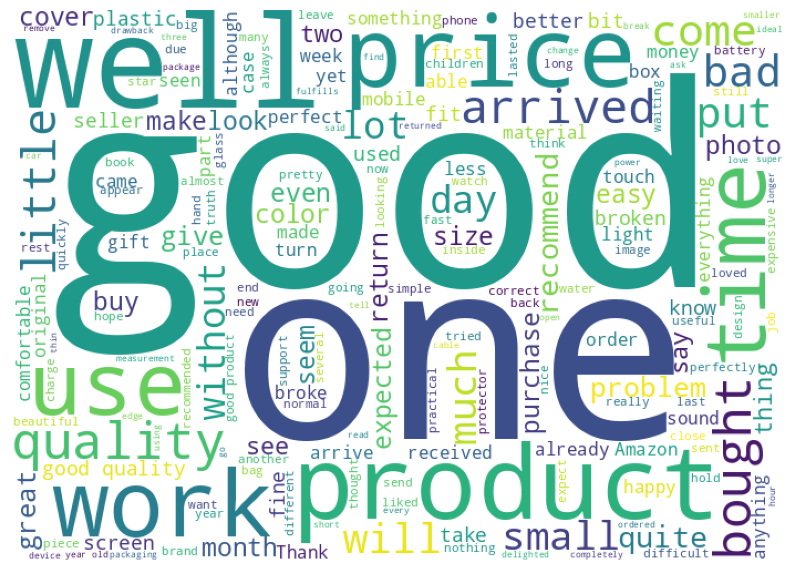

In [29]:
# wordcloud
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=' ')
  wordcloud = WordCloud(width=700,height=500,background_color = 'white').generate(df_)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()


wordcloud(df,'translated_reviews')

In [30]:
# for
# print(end=' ')















In [31]:
def yake_extractor(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data)
  keyword_list = []
  for kw in keywords:#kw >>(keyword,score)
    keyword_list.append(kw[0])
  return keyword_list


In [32]:
keywords = df.translated_reviews.apply(yake_extractor)
keywords

0      [Chinese bazaar, Sadly, Chinese, adherence, la...
1      [cardboard box indicating, cardboard box, box ...
2      [history of Spain, book gentleman explains, Sp...
3      [office chair, problem, Excellent quality, gre...
4      [improved, good sole, sole, good, true, dream ...
                             ...                        
995    [quality is terrible, terrible, unstitches eas...
996    [good quality, thermoses look good, good, qual...
997    [order never arrived, transport company, arriv...
998    [touch to work, experience is terrible, poor f...
999                        [small, give, drawings, size]
Name: translated_reviews, Length: 1000, dtype: object

In [33]:
all_keywords = []
for kw in keywords:
  all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(1000)
cnt

[('good', 170),
 ('product', 103),
 ('quality', 98),
 ('price', 81),
 ('arrived', 77),
 ('bought', 66),
 ('time', 62),
 ('work', 55),
 ('small', 52),
 ('put', 45),
 ('lot', 44),
 ('bad', 44),
 ('Good', 43),
 ('expected', 41),
 ('recommend', 41),
 ('buy', 41),
 ('perfectly', 39),
 ('great', 38),
 ('size', 37),
 ('perfect', 36),
 ('works', 35),
 ('days', 33),
 ('photo', 32),
 ('bit', 32),
 ('good quality', 31),
 ('easy', 31),
 ('fine', 31),
 ('broken', 30),
 ('money', 30),
 ('purchase', 29),
 ('give', 29),
 ('return', 29),
 ('cover', 29),
 ('comfortable', 28),
 ('plastic', 28),
 ('made', 27),
 ('problem', 25),
 ('screen', 24),
 ('arrive', 24),
 ('color', 24),
 ('job', 24),
 ('received', 24),
 ('seller', 24),
 ('case', 24),
 ('problems', 21),
 ('months', 21),
 ('short', 21),
 ('part', 20),
 ('gift', 20),
 ('pretty', 20),
 ('happy', 20),
 ('order', 20),
 ('Amazon', 20),
 ('fit', 20),
 ('material', 19),
 ('light', 19),
 ('broke', 19),
 ('make', 19),
 ('original', 18),
 ('nice', 18),
 ('mobi

In [34]:
def rake_extractor(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()

rake_keywords = df.translated_reviews.apply(rake_extractor)
rake_keywords


0      [dropped one, chinese bazaar, adherence ..., s...
1      [cardboard box indicating, somewhat small, siz...
2      [book gentleman explains everything, well easy...
3      [useful product, office chair, great comfort, ...
4      [feel tremendously satisfied, dream come true,...
                             ...                        
995    [worth nothing, unstitches easily, longer stic...
996    [thermoses look good, good quality, first plac...
997    [order never arrived ..., transport company, e...
998    [poor quality, poor fit, bit loose, already sc...
999      [known drawings, give away, small, size, liked]
Name: translated_reviews, Length: 1000, dtype: object

In [35]:
all_keywords = []
for kw in rake_keywords:
  all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(1000)
cnt

[('good', 77),
 ('price', 74),
 ('product', 68),
 ('one', 66),
 ('bought', 63),
 ('use', 61),
 ('put', 55),
 ('lot', 51),
 ('like', 48),
 ('recommend', 43),
 ('work', 39),
 ('well', 38),
 ('bad', 37),
 ('return', 36),
 ('easy', 36),
 ('quality', 36),
 ('see', 35),
 ('arrived', 34),
 ('expected', 34),
 ('photo', 32),
 ('time', 32),
 ('good quality', 30),
 ('problem', 30),
 ('money', 30),
 ('know', 30),
 ('since', 29),
 ('made', 29),
 ('small', 28),
 ('used', 27),
 ('fine', 27),
 ('able', 26),
 ('little', 26),
 ('give', 25),
 ('size', 25),
 ('comfortable', 25),
 ('seller', 25),
 ('received', 25),
 ('case', 25),
 ('buy', 25),
 ('cover', 24),
 ('purchase', 23),
 ('perfect', 23),
 ('would', 22),
 ('seems', 22),
 ('truth', 22),
 ('although', 22),
 ('much', 21),
 ('even', 21),
 ('seen', 21),
 ('great', 21),
 ('arrive', 21),
 ('take', 20),
 ('happy', 20),
 ('job', 19),
 ('amazon', 19),
 ('want', 18),
 ('comes', 18),
 ('think', 18),
 ('hope', 17),
 ('get', 17),
 ('nice', 17),
 ('mobile', 17),
 

In [36]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=e188493ea471fe4354e4b09f89e4c91a3847884ce80dd8ed1366b7fdffc78755
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [37]:
import emoji
print(emoji.demojize('🔥'))

:fire:


In [38]:
# what if unlabelled data??


In [39]:
# kmeans>>count vectorizer
#       >> TFIDF
#       >> Word2Vec

In [40]:
# preprocessing
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [41]:
clean_text_train = df.translated_reviews.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)




In [42]:
clean_text_train

0      sadly not helped glue chinese bazaar adherence...
1      arrived cardboard box indicating original one ...
2      book gentleman explains everything well easy r...
3      useful product office chair fit without proble...
4      improved good sole like much dream come true f...
                             ...                        
995    worth nothing quality terrible unstitches easi...
996    thermos look good good quality however not put...
997    order never arrived not even tell transport co...
998    bit loose press necessary touch work soon put ...
999             give away known drawing liked size small
Name: translated_reviews, Length: 1000, dtype: object

In [43]:
# Text Vectorization

In [44]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train).A
pd.DataFrame(bow,columns = count_vect.get_feature_names_out())

,able,abroad,absolutely,absorb,absorbed,absorbs,abstract,acceleration,accept,acceptable,...,year,yellow,yes,yesterday,yet,yogurt,youth,youtube,zaragoza,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf,columns = tfidf_vect.get_feature_names_out())

,able,abroad,absolutely,absorb,absorbed,absorbs,abstract,acceleration,accept,acceptable,...,year,yellow,yes,yesterday,yet,yogurt,youth,youtube,zaragoza,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223824
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [46]:
sent = clean_text_train.tolist()#['R1','R2']
splitted_sent = [sen.split() for sen in sent]#>>[[w1,w2],[w1,w2]]
splitted_sent

[['sadly',
  'not',
  'helped',
  'glue',
  'chinese',
  'bazaar',
  'adherence',
  'nail',
  'not',
  'lasted',
  'hour',
  'not',
  'dropped',
  'one',
  'several',
  'disappointed'],
 ['arrived',
  'cardboard',
  'box',
  'indicating',
  'original',
  'one',
  'broken',
  'shoe',
  'somewhat',
  'small',
  'size',
  'not',
  'appear',
  'good',
  'quality'],
 ['book',
  'gentleman',
  'explains',
  'everything',
  'well',
  'easy',
  'read',
  'get',
  'history',
  'spain'],
 ['useful',
  'product',
  'office',
  'chair',
  'fit',
  'without',
  'problem',
  'excellent',
  'quality',
  'great',
  'comfort'],
 ['improved',
  'good',
  'sole',
  'like',
  'much',
  'dream',
  'come',
  'true',
  'feel',
  'tremendously',
  'satisfied',
  'purchase'],
 ['well', 'packed', 'beaten', 'screw', 'missing', 'one', 'wheel'],
 ['look',
  'good',
  'quality',
  'attractive',
  'use',
  'running',
  'not',
  'wear',
  'original',
  'recommended',
  'purchase'],
 ['lock', 'not', 'arrived', 'part',

In [47]:
word_2vec_model = Word2Vec(splitted_sent,min_count=2,window=3)

In [48]:
word_2vec_model.vector_size

100

In [49]:
word_2vec_model.wv

In [50]:
word_2vec_model.save('word2vec.model')

In [51]:
# R1 = [w1,w2,w3]
# w1_vect = vect1
# w2_vect = vect2
# w3_vect = vect3
# R1_vect = avg(vect1,vect2,vect2)

In [52]:
# document numerical format
def vectorizer(list_of_docs,model):
  feature = []
  for rew in list_of_docs:
    zero_vector = np.zeros(model.vector_size)
    vectors = []
    for word in rew:
      try:
        word in model.wv
        vectors.append(model.wv[word])#model.wv['word']
      except KeyError:
        continue
    if vectors:
      vectors = np.asarray(vectors)
      avg_vec = vectors.mean(axis=0)
      feature.append(avg_vec)
    else:
      feature.append(zero_vector)
  return feature





In [53]:
vectorized_docs = vectorizer(splitted_sent,word_2vec_model)
vectorized_docs

[array([-1.78264417e-02,  5.76215461e-02,  1.92158613e-02,  4.32970794e-03,
         9.91164614e-03, -8.59457627e-02,  3.62853780e-02,  1.10693894e-01,
        -4.65000458e-02, -2.56919563e-02, -1.86506286e-02, -7.03432560e-02,
        -1.67856514e-02,  2.48196684e-02,  8.41503683e-03, -3.32631618e-02,
        -3.97203607e-04, -4.67340909e-02, -1.30962199e-02, -1.14337519e-01,
         3.34760025e-02,  3.77081111e-02,  1.94449462e-02, -2.86346413e-02,
        -2.55186483e-02,  7.43691856e-03, -2.62493920e-02, -3.43919173e-02,
        -4.91572283e-02, -6.72832225e-03,  3.83720659e-02,  2.37276424e-02,
         3.18907164e-02, -2.70612035e-02, -1.20437080e-02,  7.85797983e-02,
         6.22422434e-03, -5.66534996e-02, -3.04777697e-02, -9.41626877e-02,
        -1.35149825e-02, -2.51054578e-02, -1.62534323e-02,  5.24447300e-03,
         5.56492060e-02, -7.98078161e-03, -3.84984538e-02,  2.76221125e-03,
         3.18911485e-02,  3.02319136e-02,  4.59123170e-03, -4.32946421e-02,
        -1.2

In [54]:
vectorized_docs[0]

array([-1.78264417e-02,  5.76215461e-02,  1.92158613e-02,  4.32970794e-03,
        9.91164614e-03, -8.59457627e-02,  3.62853780e-02,  1.10693894e-01,
       -4.65000458e-02, -2.56919563e-02, -1.86506286e-02, -7.03432560e-02,
       -1.67856514e-02,  2.48196684e-02,  8.41503683e-03, -3.32631618e-02,
       -3.97203607e-04, -4.67340909e-02, -1.30962199e-02, -1.14337519e-01,
        3.34760025e-02,  3.77081111e-02,  1.94449462e-02, -2.86346413e-02,
       -2.55186483e-02,  7.43691856e-03, -2.62493920e-02, -3.43919173e-02,
       -4.91572283e-02, -6.72832225e-03,  3.83720659e-02,  2.37276424e-02,
        3.18907164e-02, -2.70612035e-02, -1.20437080e-02,  7.85797983e-02,
        6.22422434e-03, -5.66534996e-02, -3.04777697e-02, -9.41626877e-02,
       -1.35149825e-02, -2.51054578e-02, -1.62534323e-02,  5.24447300e-03,
        5.56492060e-02, -7.98078161e-03, -3.84984538e-02,  2.76221125e-03,
        3.18911485e-02,  3.02319136e-02,  4.59123170e-03, -4.32946421e-02,
       -1.21141728e-02,  

In [55]:
type(vectorized_docs)

list

In [56]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-0.01782644,  0.05762155,  0.01921586, ..., -0.06017464,
         0.00420924, -0.00032593],
       [-0.01723347,  0.05722216,  0.01764299, ..., -0.06064802,
         0.00288091, -0.00658732],
       [-0.01187282,  0.03835115,  0.00797044, ..., -0.03901515,
         0.00212698, -0.0042707 ],
       ...,
       [-0.01760703,  0.05747051,  0.01687734, ..., -0.06457806,
         0.00410329, -0.00399064],
       [-0.01357093,  0.03371957,  0.00995193, ..., -0.03718961,
         0.00220444, -0.00136886],
       [-0.00994629,  0.03260248,  0.01209061, ..., -0.03340884,
         0.00068844, -0.00458534]])

In [57]:
type(x_emb)

numpy.ndarray

In [58]:
def build_kmeans(clusters,data):
  kmeans_model = KMeans(n_clusters=clusters)
  y_pred = kmeans_model.fit_predict(data)
  return kmeans_model,y_pred

In [59]:
kmeans_model_count,count_pred = build_kmeans(3,bow)

In [60]:
count_pred

array([0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1,
       0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0,

In [61]:
kmeans_model_tfidf,tfidf_pred = build_kmeans(3,tfidf)
tfidf_pred

array([2, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0,
       2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1,
       2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2,

In [62]:
kmeans_model_word2vec,word2vec_pred = build_kmeans(3,x_emb)
word2vec_pred


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0,
       0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0,

In [63]:
print(f'Silhouette score with kmeans-count : {silhouette_score(bow,count_pred)}')

print(f'Silhouette score with kmeans-tfidf : {silhouette_score(tfidf,tfidf_pred)}')

print(f'Silhouette score with kmeans-word2vec : {silhouette_score(x_emb,word2vec_pred)}')

Silhouette score with kmeans-count : 0.02038775211396423
Silhouette score with kmeans-tfidf : 0.006750116790416254
Silhouette score with kmeans-word2vec : 0.4610571235855692


In [64]:
def visulize_silhouette(data,model,title1):
  print(f'Silhouette visualizer for {title1}')
  visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
  visualizer.fit(data)
  visualizer.show()

Silhouette visualizer for Kmeans-count vectorizer


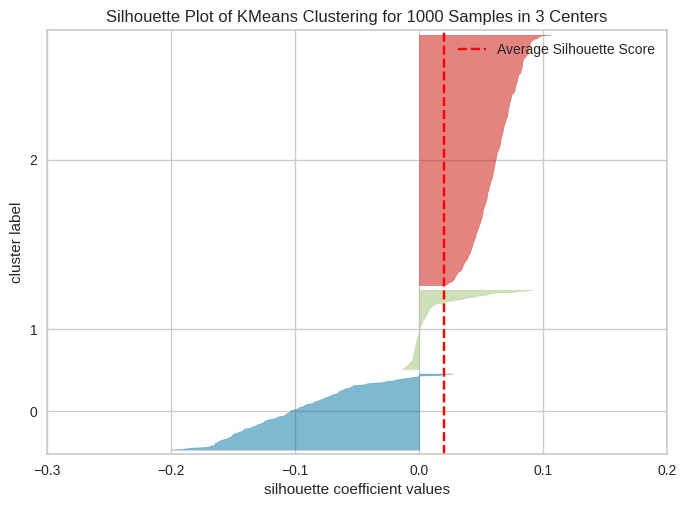

In [65]:
#kmeans-count
visulize_silhouette(bow,kmeans_model_count,'Kmeans-count vectorizer')

Silhouette visualizer for Kmeans-tfidf vectorizer


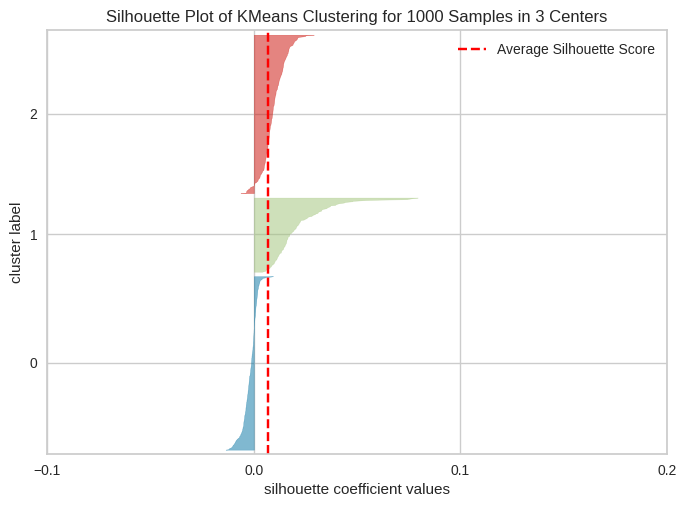

In [66]:
#kmeans-tfidf
visulize_silhouette(tfidf,kmeans_model_tfidf,'Kmeans-tfidf vectorizer')

Silhouette visualizer for Kmeans-word2vec


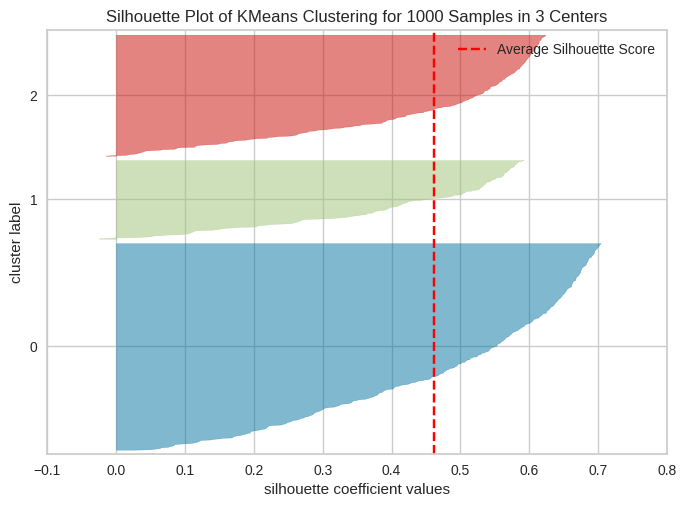

In [67]:
#kmeans-word2vec
visulize_silhouette(x_emb,kmeans_model_word2vec,'Kmeans-word2vec')

In [68]:
df['target'] = pd.Series(word2vec_pred)
df

,review_body,stars,language,translated_reviews,target
0,"Tristemente no me ha servido para nada, cualqu...",1,es,"Sadly, it hasn't helped me at all, any glue fr...",1
1,Ha llegado en una caja de cartón que indicaba ...,2,es,It has arrived in a cardboard box indicating t...,0
2,Es un señor libró explica todo muy bien fácil ...,5,es,It is a book gentleman explains everything ver...,0
3,Producto muy útil para la silla de oficina y s...,5,es,Very useful product for the office chair and i...,0
4,Están mejoradas. Tiene la suela buena. Me gust...,5,es,They are improved. It has a good sole. I like ...,0
...,...,...,...,...,...
995,"No vale nada, la calidad es malísima. Se desco...",1,es,"It's worth nothing, the quality is terrible. I...",0
996,Los termos tienen bueba pinta y de calidad. Si...,3,es,The thermoses look good and are of good qualit...,0
997,Nunca me llegó el pedido... nisiquiera me come...,1,es,The order never arrived...they didn't even tel...,1
998,Queda un poco olgada y hay que apretar más de ...,2,es,It is a bit loose and you have to press more t...,2


In [69]:
df['target'].value_counts()

0    508
2    298
1    194
Name: target, dtype: int64